In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [6]:
topic_colours = {
    'Land use': '#d0d1e6',
    'Power plants': '#a6bddb',
    'Biogas': '#74a9cf',
    'Chemical looping': '#3690c0',
    'Pyrolysis': '#0570b0',
    'Climate policy': '#034e7b',
    'Biofuel': '#c7e9c0',
    'Diplomacy': '#a1d99b',
    'Climate models': '#74c476',
    'NETs challenges': '#41ab5d',
    'Biomass waste': '#238b45',
    'Forest management': '#005a32',
    # 'Biofuel': '#fee8c8',
    'Coal power': '#fdbb84',
    'Biocarbons': '#e34a33',
}

In [7]:
df = pd.read_csv('../data/beccs_wTopicDescriptions.csv')
paper_per_year = df.groupby('year', as_index=False).size().rename(columns={'size': 'total_size_per_year'})
df['topic_name_15_morphed'] = df['topic_name_15'].replace(topic_colours)

In [10]:
# top10_per_year = df.groupby(['year', 'topic_name_10'], as_index=False).size()
top15_per_year = df.groupby(['year', 'topic_name_15'], as_index=False).size()
# top20_per_year = df.groupby(['year', 'topic_name_20'], as_index=False).size()
top15morphed_per_year = df.groupby(['year', 'topic_name_15_morphed'], as_index=False).size()


def add_missing_lines_relative_display(topics_per_year, topics_col_name, topics):
    for year in range(1990, 2023):
        for topic in topics:
            if topics_per_year.loc[(topics_per_year.year == year) & (topics_per_year[topics_col_name] == topic)].shape[
                0] == 0:
                one_row = {'year': year, topics_col_name: topic, 'size': 0}
                topics_per_year = pd.concat([topics_per_year, pd.DataFrame([one_row])], ignore_index=True)
    topics_per_year = topics_per_year.sort_values('year')
    topics_per_year = topics_per_year.merge(paper_per_year, on='year', how='left')
    topics_per_year['rel_count'] = topics_per_year['size'] / topics_per_year['total_size_per_year']
    return topics_per_year


# top10_per_year = add_missing_lines_relative_display(top10_per_year, 'topic_name_10', tec_10 + soc_10)
top15_per_year = add_missing_lines_relative_display(top15_per_year, 'topic_name_15', list(topic_colours.keys()))
# top20_per_year = add_missing_lines_relative_display(top20_per_year, 'topic_name_20', tec_20 + soc_20)
top15morphed_per_year = add_missing_lines_relative_display(top15morphed_per_year, 'topic_name_15_morphed',
                                                           top15morphed_per_year.topic_name_15_morphed.unique().tolist())

# top10_per_year['color'] = top10_per_year['topic_name_10'].replace(top10_col)
top15_per_year['color'] = top15_per_year['topic_name_15'].replace(topic_colours)
# top20_per_year['color'] = top20_per_year['topic_name_20'].replace(top20_col)
top15morphed_per_year['color'] = top15morphed_per_year['topic_name_15_morphed'].replace(topic_colours)

In [12]:
years = [i for i in range(1990, 2023)]
ars = [f'AR{i}' for i in range(1, 7)]

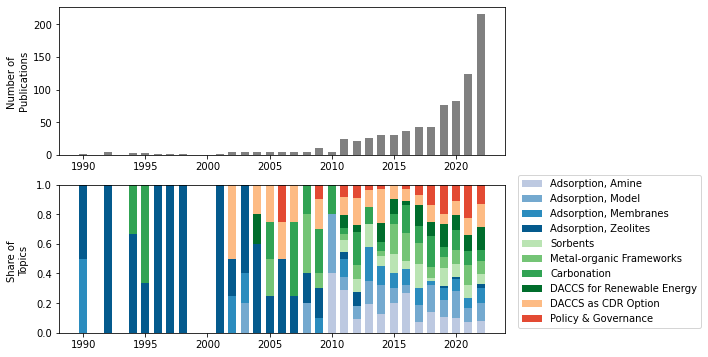

In [31]:
list_topics = tec_10 + soc_10
df_topics = top10_per_year
col_name = 'topic_name_10'
filename = 'figures/time_10topics.png'

width = 0.65  # the width of the bars

fig, ax = plt.subplots(2, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 1]})

fig.add_gridspec(ncols=1, nrows=2,
                 )
### first plot
ax[0].bar(paper_per_year['year'], paper_per_year['total_size_per_year'], width, color='grey')
ax[0].set_ylabel('Number of \nPublications')

### second plot
prev_values = np.zeros(len(df_topics.loc[df_topics[col_name] == list_topics[0]]))
for i, topic in enumerate(list_topics):
    #print(topic)
    ax[1].bar(years, df_topics.loc[df_topics[col_name] == topic, 'rel_count'],
              width, bottom=prev_values,
              label=topic,
              color=df_topics.loc[df_topics[col_name] == topic, 'color'])
    prev_values += np.array(df_topics.loc[df_topics[col_name] == topic, 'rel_count'])
ax[1].set_ylabel('Share of \nTopics ')

ax[1].legend(bbox_to_anchor=(1.45, 1.1))

fig.align_ylabels(ax)
fig.savefig(filename, bbox_inches='tight', facecolor='white', edgecolor='none')

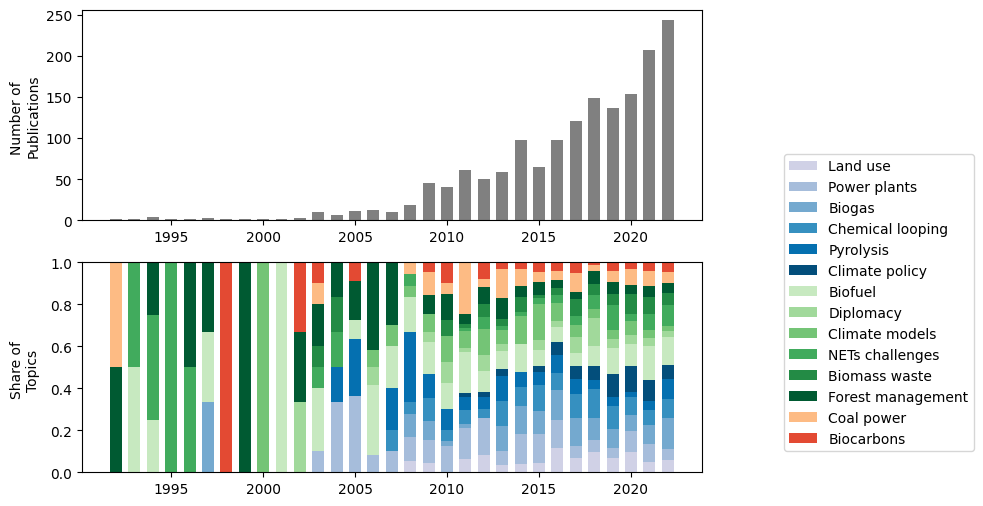

In [14]:
list_topics = list(topic_colours.keys())
df_topics = top15_per_year
col_name = 'topic_name_15'
filename = '../figures/time_15topics.png'

width = 0.65  # the width of the bars

fig, ax = plt.subplots(2, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 1]})

fig.add_gridspec(ncols=1, nrows=2,
                 )
### first plot
ax[0].bar(paper_per_year['year'], paper_per_year['total_size_per_year'], width, color='grey')
ax[0].set_ylabel('Number of \nPublications')

### second plot
prev_values = np.zeros(len(df_topics.loc[df_topics[col_name] == list_topics[0]]))
for i, topic in enumerate(list_topics):
    #print(topic)
    ax[1].bar(years, df_topics.loc[df_topics[col_name] == topic, 'rel_count'],
              width, bottom=prev_values,
              label=topic,
              color=df_topics.loc[df_topics[col_name] == topic, 'color'])
    prev_values += np.array(df_topics.loc[df_topics[col_name] == topic, 'rel_count'])
ax[1].set_ylabel('Share of \nTopics ')

ax[1].legend(bbox_to_anchor=(1.45, 1.55))

fig.align_ylabels(ax)
fig.savefig(filename, bbox_inches='tight', facecolor='white', edgecolor='none')

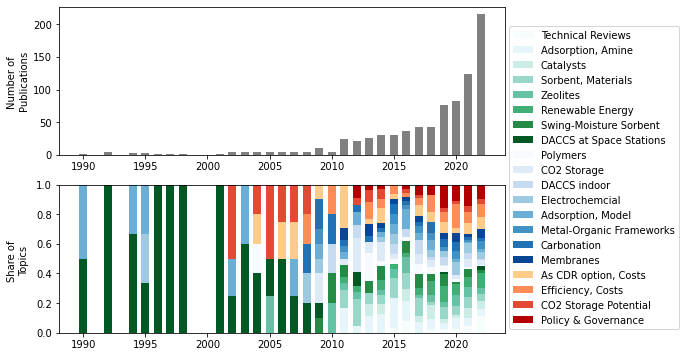

In [90]:
list_topics = tec_20 + soc_20
df_topics = top20_per_year
col_name = 'topic_name_20'
filename = 'figures/time_20topics.png'

width = 0.65  # the width of the bars

fig, ax = plt.subplots(2, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 1]})

fig.add_gridspec(ncols=1, nrows=2,
                 )
### first plot
ax[0].bar(paper_per_year['year'], paper_per_year['total_size_per_year'], width, color='grey')
ax[0].set_ylabel('Number of \nPublications')

### second plot
prev_values = np.zeros(len(df_topics.loc[df_topics[col_name] == list_topics[0]]))
for i, topic in enumerate(list_topics):
    #print(topic)
    ax[1].bar(years, df_topics.loc[df_topics[col_name] == topic, 'rel_count'],
              width, bottom=prev_values,
              label=topic,
              color=df_topics.loc[df_topics[col_name] == topic, 'color'])
    prev_values += np.array(df_topics.loc[df_topics[col_name] == topic, 'rel_count'])
ax[1].set_ylabel('Share of \nTopics ')

ax[1].legend(bbox_to_anchor=(1.4, 2.1))

fig.align_ylabels(ax)
fig.savefig(filename, bbox_inches='tight', facecolor='white', edgecolor='none')

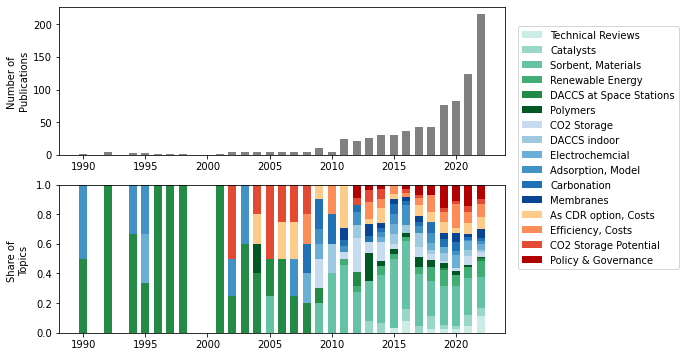

In [45]:
list_topics = tec_20_morphed + soc_20_morphed
df_topics = top20morphed_per_year
col_name = 'topic_name_20_morphed'
filename = 'figures/time_20morphed_topics.png'

width = 0.65  # the width of the bars

fig, ax = plt.subplots(2, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 1]})

fig.add_gridspec(ncols=1, nrows=2,
                 )
### first plot
ax[0].bar(paper_per_year['year'], paper_per_year['total_size_per_year'], width, color='grey')
ax[0].set_ylabel('Number of \nPublications')

### second plot
prev_values = np.zeros(len(df_topics.loc[df_topics[col_name] == list_topics[0]]))
for i, topic in enumerate(list_topics):
    #print(topic)
    ax[1].bar(years, df_topics.loc[df_topics[col_name] == topic, 'rel_count'],
              width, bottom=prev_values,
              label=topic,
              color=df_topics.loc[df_topics[col_name] == topic, 'color'])
    prev_values += np.array(df_topics.loc[df_topics[col_name] == topic, 'rel_count'])
ax[1].set_ylabel('Share of \nTopics ')

ax[1].legend(bbox_to_anchor=(1.4, 2.1))

fig.align_ylabels(ax)
fig.savefig(filename, bbox_inches='tight', facecolor='white', edgecolor='none')